In [52]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
#importing dataset
ds=pd.read_csv('Airbnb NYC 2019.csv')
ds

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [55]:
ds.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [56]:
#renaming columns
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}
     

In [57]:
ds=ds.rename(columns = rename_col)
ds.head(2)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [58]:
#knowing shape of dataset
ds.shape

(48895, 16)

In [59]:
#looking for datatypes of each column
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [60]:
#dropping duplicates from the dataset
ds=ds.drop_duplicates()
ds.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

In [61]:
#knowing null values in each columns
ds.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [62]:
#filling the null values
ds['listing_name'].fillna('unknown',inplace=True)
ds['host_name'].fillna('no_name',inplace=True)

In [63]:
ds[['host_name','listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

In [64]:
#dropping not-required column
ds=ds.drop(['last_review'], axis=1) 

In [65]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listings_count  48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

In [66]:
ds['reviews_per_month']=ds['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [67]:
ds['reviews_per_month'].isnull().sum()   

np.int64(0)

In [68]:
ds.sample(5)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
36220,28805003,"Micro-Studio in Hells Kitchen, Shared Bath",198861577,Novo,Manhattan,Hell's Kitchen,40.76021,-73.99197,Private room,69,30,0,0,5,0
17848,13992442,Comfortable 1-bedroom in South Slope,57509618,Kelly,Brooklyn,Sunset Park,40.66206,-73.99767,Private room,50,1,0,0,1,0
11248,8720923,Sunny and Spacious Private Bedroom,41324442,Richard,Manhattan,Lower East Side,40.71971,-73.98494,Private room,90,4,59,1,1,2
19998,16010302,"Chic Chelsea charming apartment, GREAT DECOR",18939173,Pablo,Manhattan,Chelsea,40.75133,-73.99965,Entire home/apt,228,4,16,0,1,103
13065,9887763,Spacious and comfortable rm in LIC,31534322,Nia,Queens,Long Island City,40.74840,-73.94604,Private room,90,2,59,1,4,33


In [113]:
#knowing unique values 
ds['listing_id'].nunique()

45918

In [70]:
ds['neighbourhood'].nunique()

221

In [71]:
ds['neighbourhood_group'].nunique()

5

In [72]:
ds['host_name'].nunique()

11453

In [73]:
ds['listing_name'].nunique()

47906

In [74]:
ds[ds['host_name']=='David']['listing_name'].nunique()

402

In [75]:
ds[ds['listing_name']==ds['host_name']].head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0,18,90


In [76]:
ds.loc[(ds['neighbourhood_group']=='Queens') & (ds['host_name']=='Alex')].head(4)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
3523,2104910,SPACIOUS APT BK/QUEENS w/BACKYARD!,10643810,Alex,Queens,Ridgewood,40.70988,-73.90845,Entire home/apt,99,2,57,0,1,42
4512,3116519,Large 900 sqft Artist's Apartment,3008690,Alex,Queens,Ridgewood,40.70124,-73.90941,Entire home/apt,70,10,0,0,1,0
6178,4518242,Zen MiniPalace Astoria,23424461,Alex,Queens,Astoria,40.76369,-73.91601,Entire home/apt,80,1,3,0,1,0
10543,8090529,"Modern studio in Queens, NY",17377835,Alex,Queens,Sunnyside,40.74674,-73.91881,Entire home/apt,250,3,0,0,1,364


In [77]:
ds.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


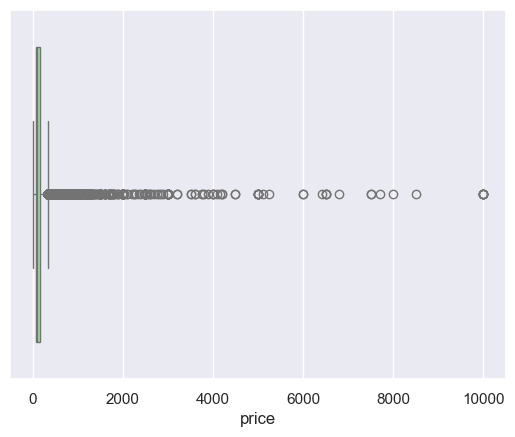

In [78]:
#boxplot
sns.boxplot(x=ds['price'],color='lightgreen')
plt.show()

In [79]:

# writing a outlier function for removing outliers in important columns.
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [80]:
lower_bound,upper_bound = iqr_technique(ds['price'])
ds=ds[(ds.price>lower_bound) & (ds.price<upper_bound)]

(45918, 15)


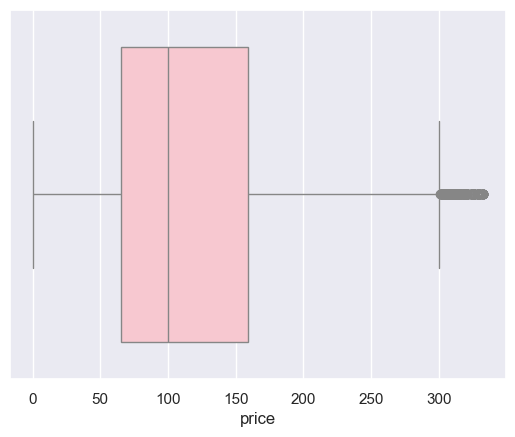

In [81]:
sns.boxplot(x=ds['price'],color='pink')
print(ds.shape)

In [82]:
print(ds['price'].max())

333


Text(0.5, 1.0, 'Distribution of Airbnb Prices')

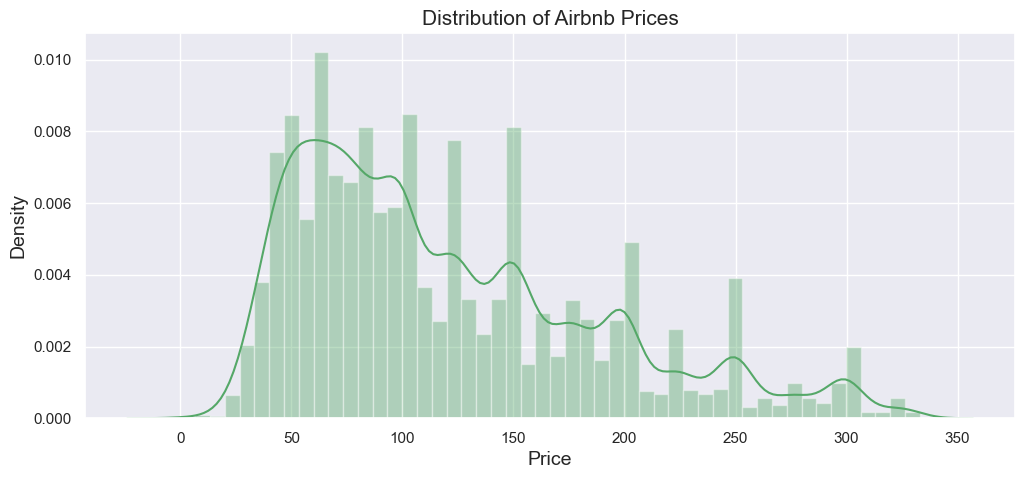

In [83]:
#Data Visualization
# (1) Distribution Of Airbnb Bookings Price Range Using Histogram
plt.figure(figsize=(12, 5))
sns.distplot(ds['price'],color=('g'))
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Airbnb Prices',fontsize=15)

In [84]:
# (2) Total Listing/Property count in Each Neighborhood Group using Count plot
counts=ds['neighbourhood_group'].value_counts()
Top_Neighborhood_group = counts.reset_index()
Top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']
Top_Neighborhood_group

,Neighborhood_Groups,Listing_Counts
0,Manhattan,19501
1,Brooklyn,19415
2,Queens,5567
3,Bronx,1070
4,Staten Island,365


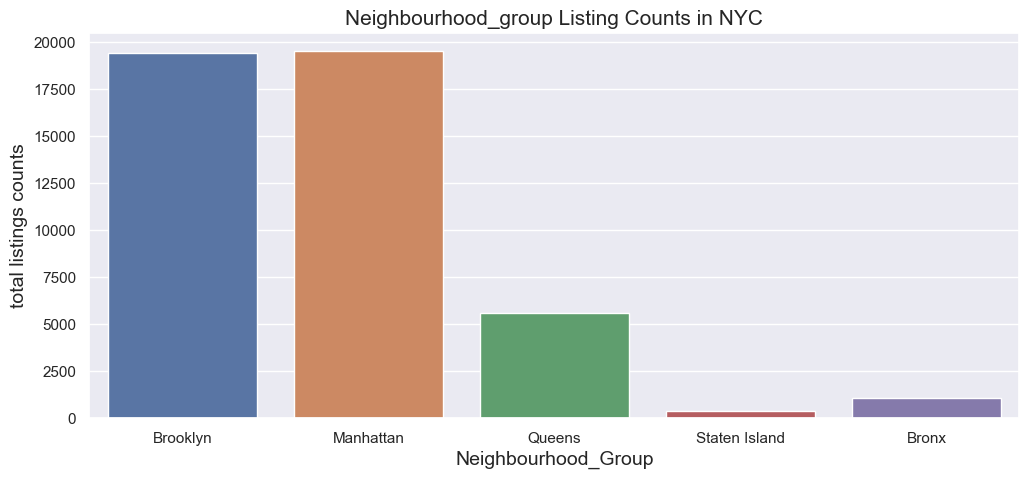

In [125]:
plt.figure(figsize=(12,5))
sns.countplot(x="neighbourhood_group", data=ds, hue="neighbourhood_group")
plt.title('Neighbourhood_group Listing Counts in NYC', fontsize=15)
plt.ylabel('total listings counts', fontsize=14)
plt.xlabel('Neighbourhood_Group', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

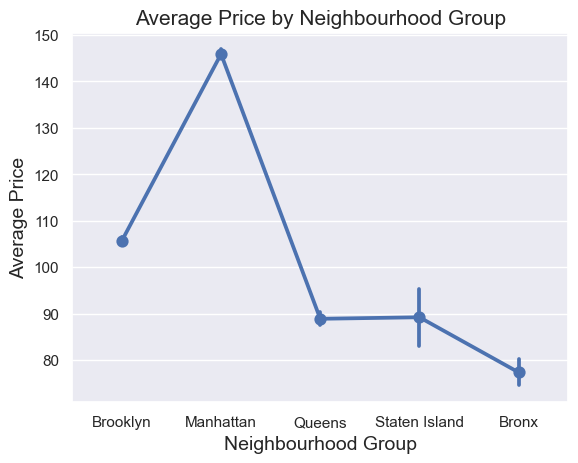

In [88]:
# (3) Average Price Of Each Neighborhood Group using Point Plot
from statistics import mean
sns.pointplot(x = 'neighbourhood_group', y='price', data=ds, estimator = np.mean)
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)

In [89]:
# (4) Top Neighborhoods by Listing/property using Bar plot
Top_Neighborhoods=ds['neighbourhood'].value_counts()[:10].reset_index()
Top_Neighborhoods.columns = ['Top_Neighborhoods', 'Listing_Counts']
Top_Neighborhoods

,Top_Neighborhoods,Listing_Counts
0,Williamsburg,3732
1,Bedford-Stuyvesant,3638
2,Harlem,2585
3,Bushwick,2438
4,Upper West Side,1788
5,Hell's Kitchen,1731
6,East Village,1714
7,Upper East Side,1670
8,Crown Heights,1519
9,Midtown,1143


Text(0.5, 1.0, 'Listings by Top Neighborhoods in NYC')

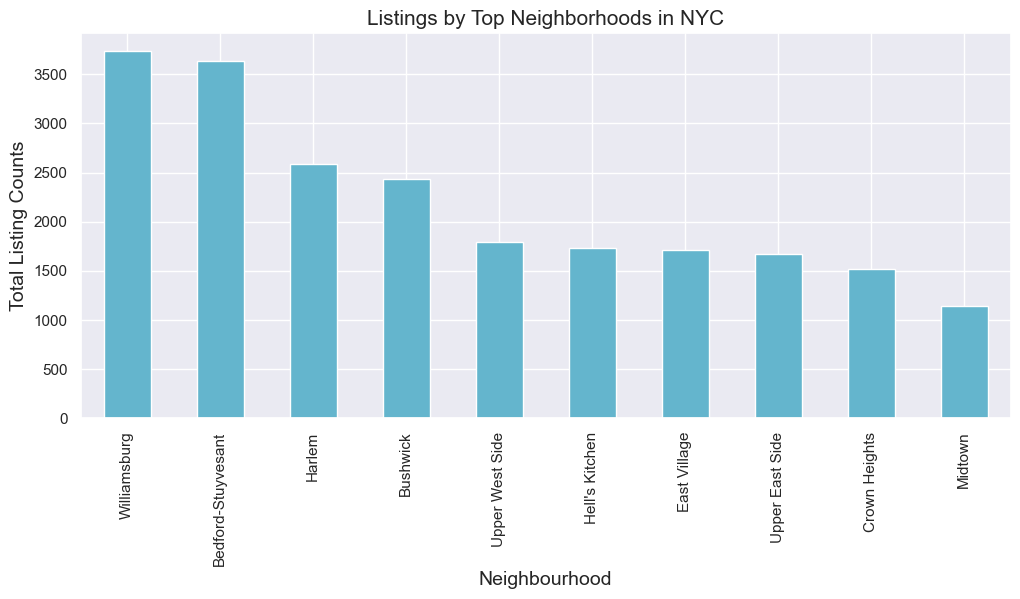

In [124]:
top_10_neigbourhoods=ds['neighbourhood'].value_counts().nlargest(10)
top_10_neigbourhoods.plot(kind='bar', figsize=(12,5),color='c')
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Total Listing Counts', fontsize=14)
plt.title('Listings by Top Neighborhoods in NYC', fontsize=15)

In [92]:
# (5) Top Hosts With More Listing/Property using Bar chart
top_10_hosts=ds['host_name'].value_counts()[:10].reset_index()
top_10_hosts.columns = ['host_name', 'Total_listings']
top_10_hosts



,host_name,Total_listings
0,Michael,383
1,David,368
2,John,276
3,Sonder (NYC),272
4,Alex,253
5,Sarah,221
6,Daniel,212
7,Maria,197
8,Jessica,185
9,Mike,184


Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

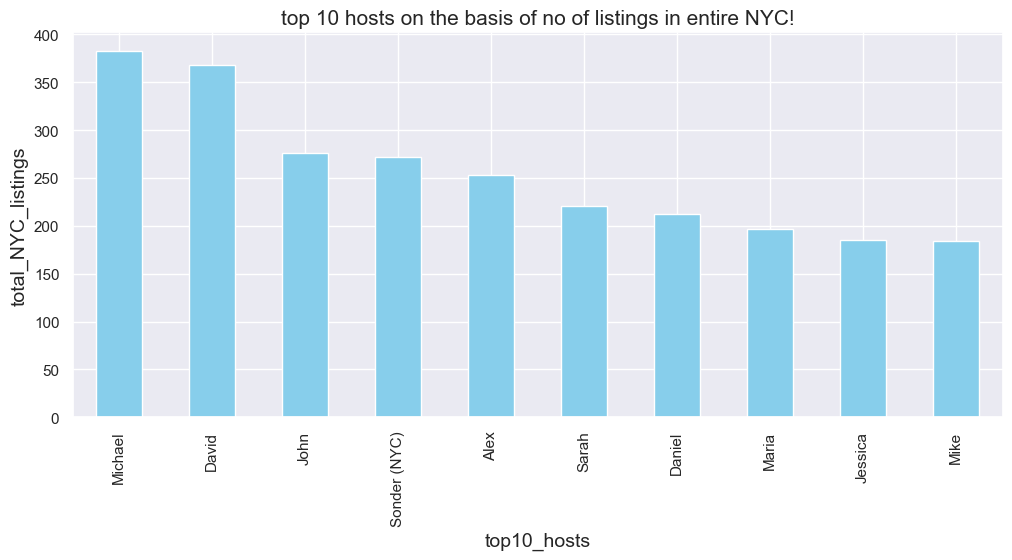

In [123]:
top_hosts=ds['host_name'].value_counts()[:10]
top_hosts.plot(kind='bar', color='skyblue', figsize=(12, 5))
plt.xlabel('top10_hosts', fontsize=14)
plt.ylabel('total_NYC_listings', fontsize=14)
plt.title('top 10 hosts on the basis of no of listings in entire NYC!', fontsize=15)

In [108]:
# (6) Total Counts Of Each Room Type
top_room_type=ds['room_type'].value_counts().reset_index()
top_room_type.columns = ['Room_Type', 'Total_counts']
top_room_type

,Room_Type,Total_counts
0,Entire home/apt,22784
1,Private room,21996
2,Shared room,1138


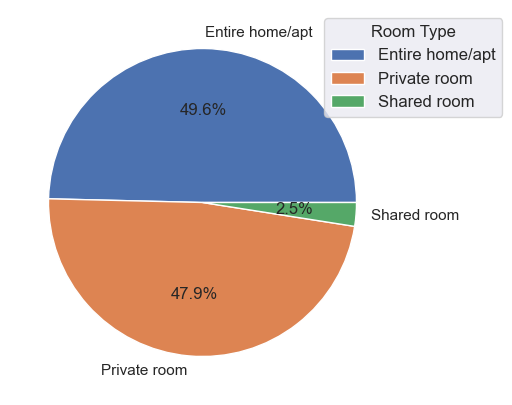

In [110]:
plt.figure(figsize=(5, 5))
room_type_counts=ds['room_type'].value_counts()
labels = room_type_counts.index
sizes = room_type_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.legend(title='Room Type', bbox_to_anchor=(0.8, 0, 0.5, 1), fontsize='12')
plt.show()

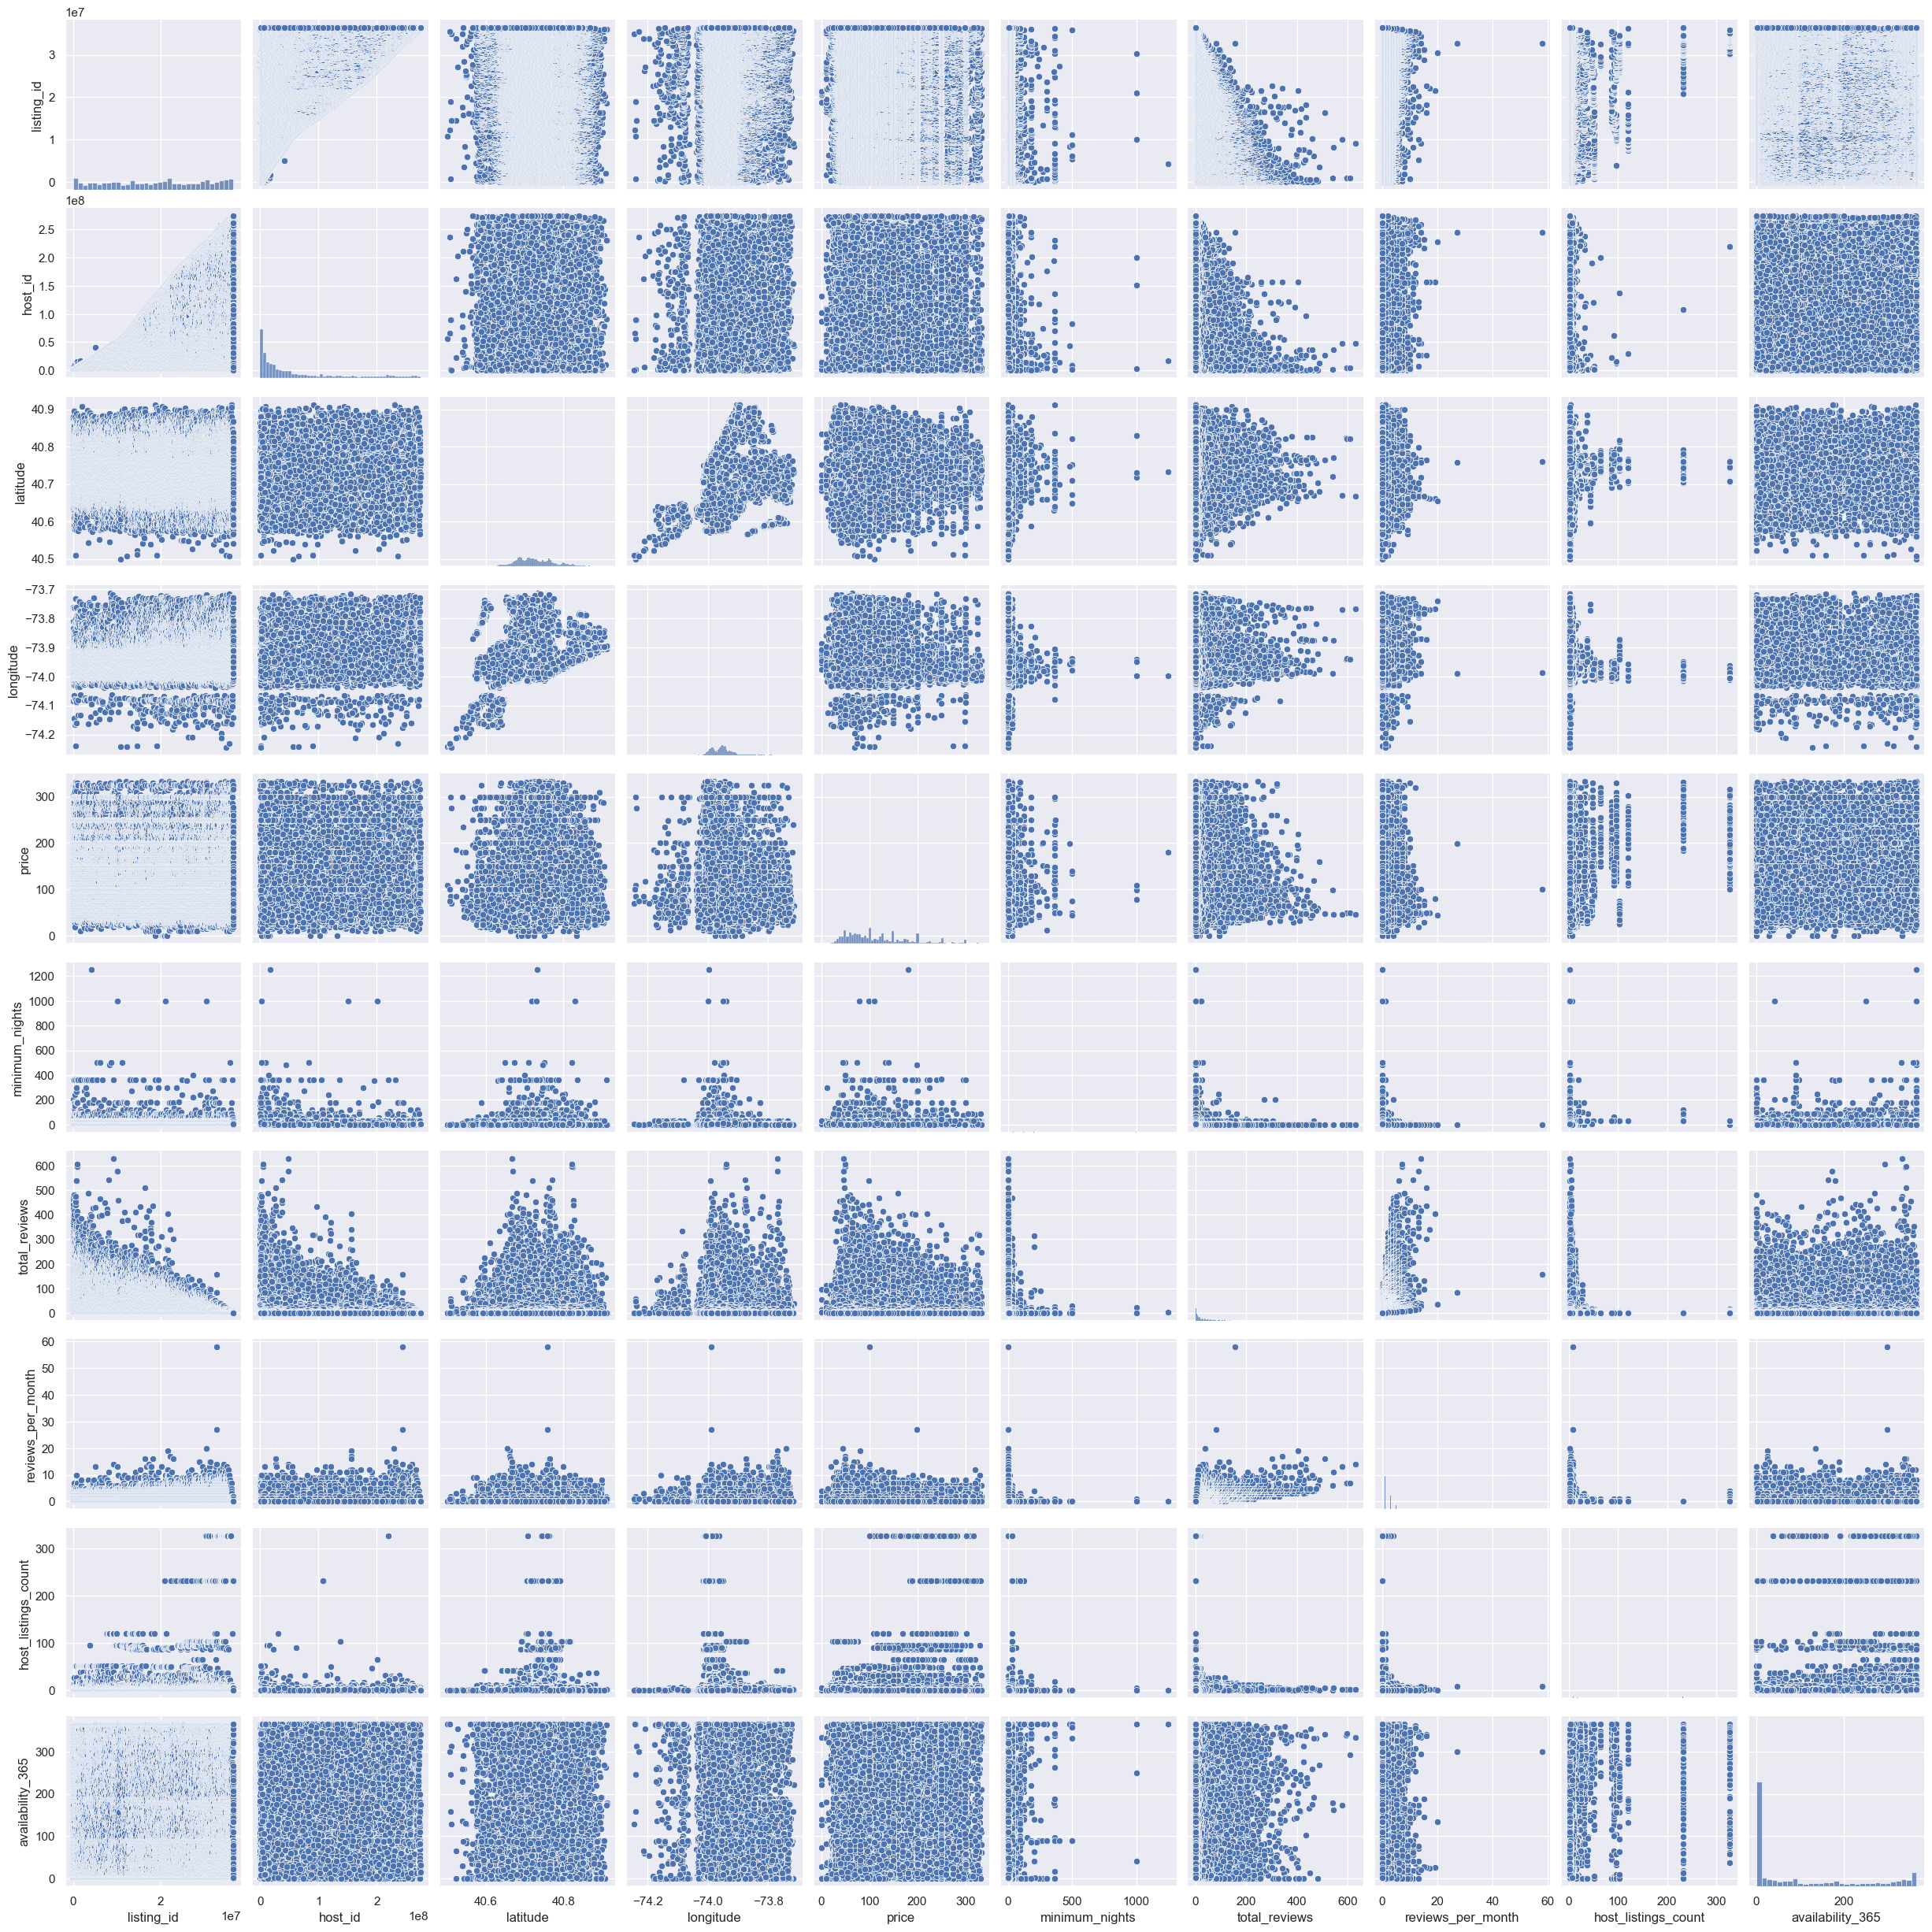

In [111]:
# (7) Pair Plot Visualization
sns.pairplot(ds)
plt.show()
